In [38]:
using PCHIPInterpolation: Interpolator
using Interpolations: interpolate, Gridded, Linear, Flat, extrapolate
using Plots

In [69]:
# Function
f(x) = cos(x*5)/2 + 0.5

f (generic function with 1 method)

In [98]:
# Generate original data
xmin, xmax = -1.5, 3.0
x = collect(Float64, range(xmin, xmax, length=10))
z = @. f(x)
;

In [99]:
# Create interpolator
itp_a = Interpolator(x,z)
itp_b = extrapolate(interpolate((x,),z, Gridded(Linear())), Flat())
;

In [100]:
# Generate new axes (high resolution)
x2 = range(xmin-2, xmax+2, length=400)
;

In [101]:
# Do interpolation to new axes
z_a = [itp_a(x) for x in x2]
z_b = [itp_b(x) for x in x2]
;

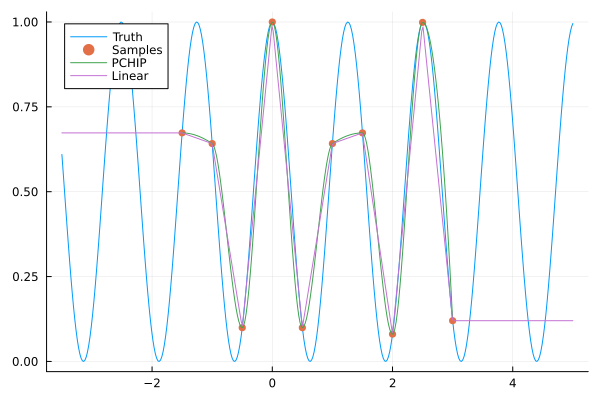

In [102]:
# Plot to compare
fig = plot()
plot!(fig, x2, f.(x2) , lab="Truth")
scatter!(fig, x, z , lab="Samples", markersize=4, msw=0)
plot!(fig, x2, z_a , lab="PCHIP")
plot!(fig, x2, z_b , lab="Linear")
display(fig)